In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.utilityFunctions import plotMomentScaling, fitMoments, plotCorrelationMeanSize, cumulative_data, susmanProcessing, autocorrelationExponential
from scipy.stats import linregress
from statsmodels.tsa.stattools import acf
from scipy.optimize import curve_fit
from typing import Dict

In [2]:
tmp = pd.read_csv(
    '/Users/tommaso/Desktop/masterThesis/data/realData/Susman/longLineages/susmanDataLL.csv')
tmp['lineage_ID'] = tmp['lineage_ID'].astype(int)
tmp1 = tmp[tmp['lineage_ID'] == 1]
tmp1

,div_and_fold,fold_growth,division_ratio,added_length,generationtime,length_birth,length_final,growth_rate,lineage_ID,generation,start_time,end_time
0,NaN,0.321917,NaN,1.827942,0.333333,4.813286,6.641228,0.965750,1,0.0,0.000000,0.333333
1,0.888368,0.747527,0.420675,3.106062,0.666667,2.793796,5.899857,1.121291,1,1.0,0.416667,1.083333
2,0.997835,0.705227,0.492927,2.978883,0.583333,2.908199,5.887083,1.208960,1,2.0,1.166667,1.750000
3,0.862614,0.482915,0.532217,1.945071,0.333333,3.133206,5.078277,1.448745,1,3.0,1.833333,2.166667
4,1.013481,0.683127,0.511844,2.547455,0.500000,2.599284,5.146739,1.366254,1,4.0,2.250000,2.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.317748,1.050120,0.461074,3.733679,0.666667,2.009521,5.743200,1.575181,1,247.0,149.000000,149.666667
248,0.898678,0.613871,0.486411,2.367734,0.500000,2.793555,5.161288,1.227743,1,248.0,149.750000,150.250000
249,1.154978,0.774085,0.532590,3.212325,0.583333,2.748850,5.961175,1.327003,1,249.0,150.333333,150.916667
250,0.916800,0.482685,0.565779,2.092496,0.416667,3.372708,5.465204,1.158445,1,250.0,151.000000,151.416667


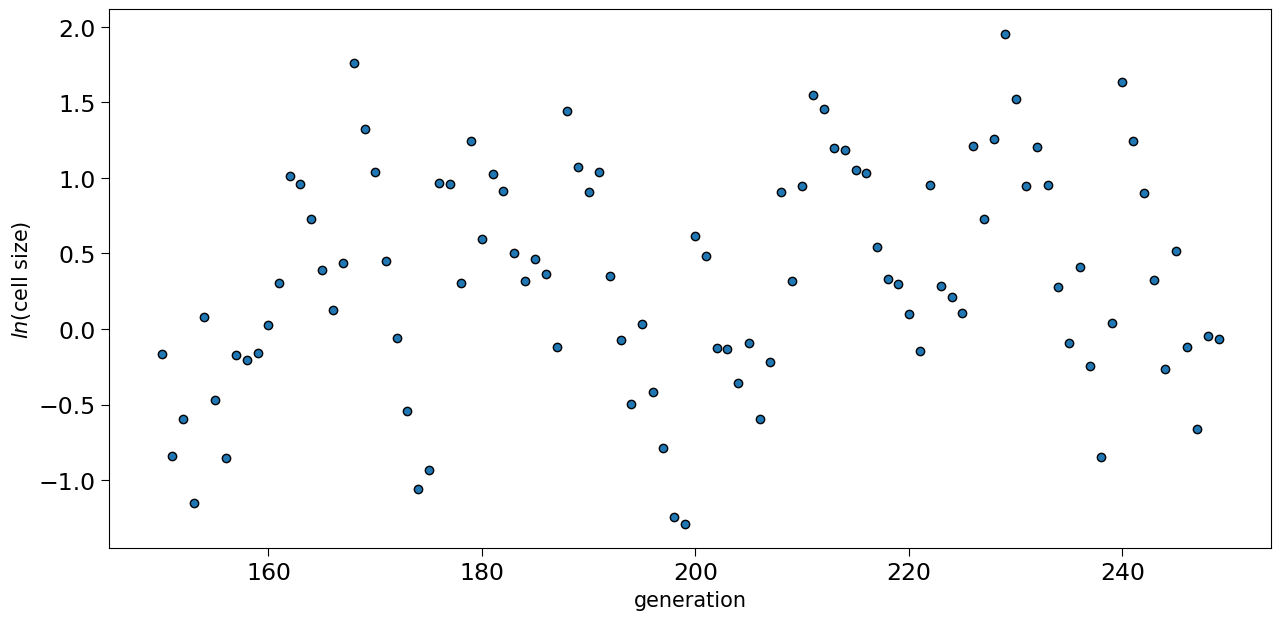

In [28]:
tmp = np.load(
    '/Users/tommaso/Desktop/masterThesis/data/nullH/nullHShortLineages/timeSerieses.npy')
plt.figure(figsize=(15, 7))
plt.scatter(range(150, 250), tmp[0, -100:], edgecolor='black')
plt.tick_params(axis='both', which='major', labelsize=17, length=6)
plt.xlabel('generation', fontsize=15)
plt.ylabel('$ln($cell size$)$', fontsize=15)
# plt.savefig('/Users/tommaso/Desktop/simulatedLineage.png',
#           dpi=300, bbox_inches='tight')

In [13]:
1 / np.log(2) - 1

0.4426950408889634

In [4]:
tmp2 = np.cumsum(tmp1['generationtime']).shift(1)
tmp2[np.isnan(tmp2)] = 0
tmp3 = np.cumsum(tmp1['generationtime'])

In [5]:
finalY = []
finalX = []
for i in range(len(tmp1)):
    finalY.append(tmp1['length_birth'][i])
    finalX.append(tmp2[i])
    finalY.append(tmp1['length_final'][i])
    finalX.append(tmp3[i])

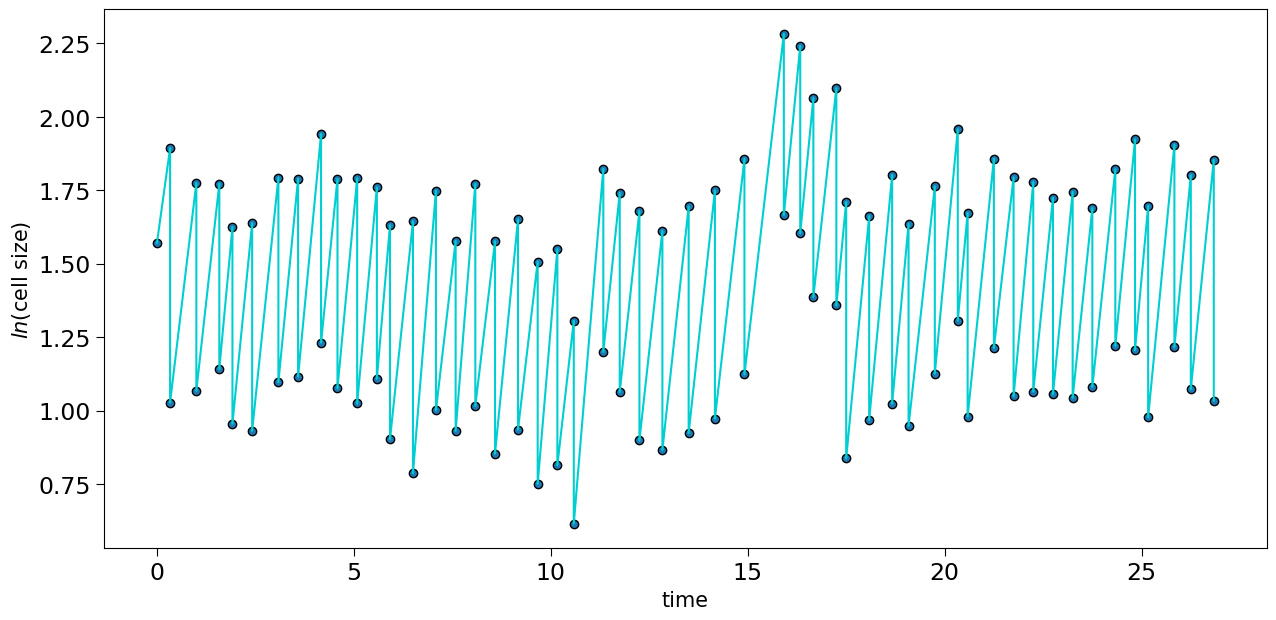

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(15, 7))
plt.scatter(tmp2[tmp2 < 27], np.log(tmp1['length_birth'])
            [tmp2 < 27], color='C0', edgecolor='black')
plt.scatter(np.cumsum(tmp1['generationtime'])[tmp2 < 27][:-1], np.log(
    tmp1['length_final'])[tmp2 < 27][:-1], color='C0', edgecolor='black')
plt.plot(np.array(finalX)[np.array(finalX) < 27], np.log(
    finalY)[np.array(finalX) < 27], color='darkturquoise')

plt.tick_params(axis='both', which='major', labelsize=17, length=6)
plt.xlabel('time', fontsize=15)
plt.ylabel('$ln($cell size$)$', fontsize=15)
# plt.savefig('/Users/tommaso/Desktop/dataLineage.png',
#            dpi=300, bbox_inches='tight')

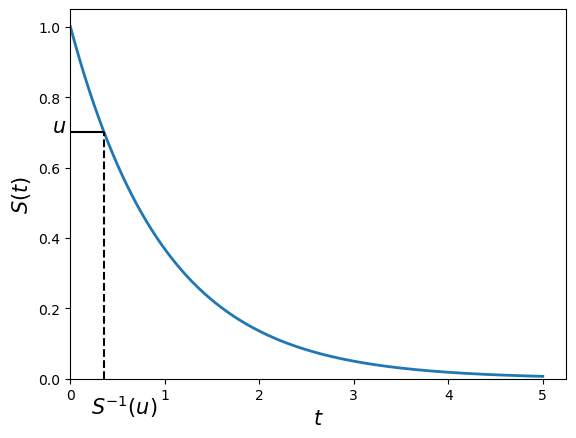

In [2]:
xAxis = np.linspace(0, 5, 1000)


def f(x):
    return np.exp(-x)


plt.plot(xAxis, f(xAxis), linewidth=2)
plt.xlabel('$t$', fontsize=15)
plt.ylabel('$S(t)$', fontsize=15)
plt.hlines(xmin=0, xmax=-np.log(.7), y=0.7, color='black')
plt.vlines(ymin=0, ymax=0.7, x=-np.log(0.7), color='black', linestyle='--')
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.text(-0.2, 0.7, s='$u$', fontsize=15)
_ = plt.text(-np.log(.8), -0.1, s='$S^{-1}(u)$', fontsize=15)
plt.savefig('/Users/tommaso/Desktop/sampling.png', dpi=300)

In [3]:
basePath: str = '/Users/tommaso/Desktop/masterThesis/data/realData/'
dbPath: Dict[str, str] = {'Stawski': 'Susman/longLineages/',
                          'tanouchi25C': 'Tanouchi/Tanouchi25/', 'tanouchi37C': 'Tanouchi/Tanouchi37/'}

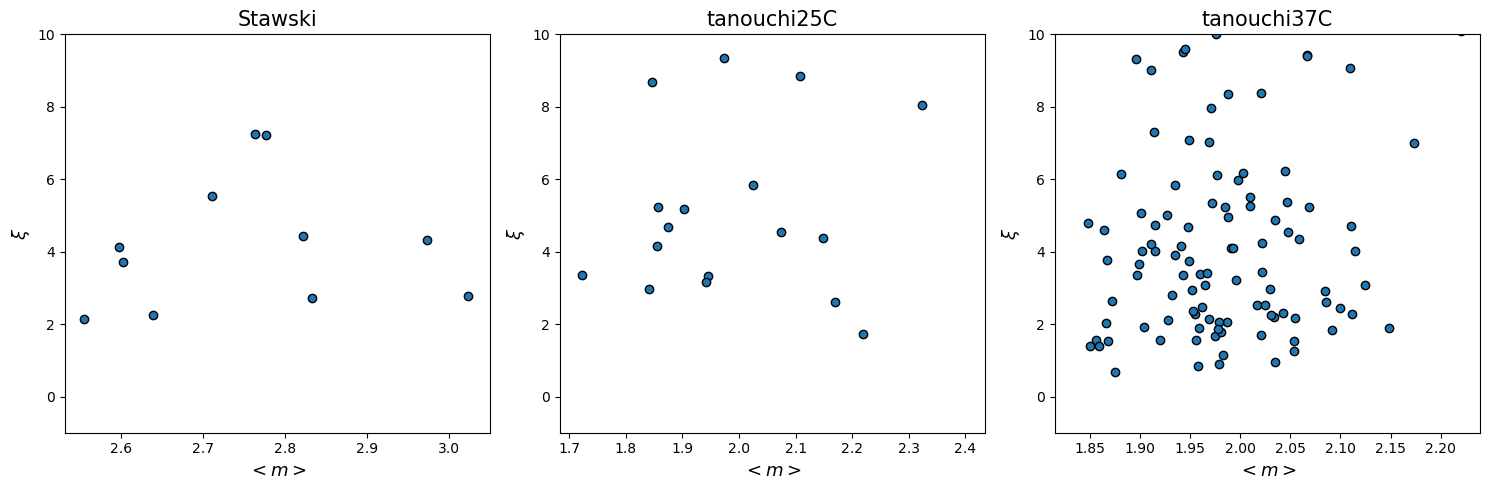

In [16]:
fig, ax_ = plt.subplots(1, 3, figsize=(15, 5))
for ax, dataset in zip(ax_, dbPath.keys()):
    tanouchiVector: np.ndarray = np.load(
        basePath + dbPath[dataset] + 'tanouchiCorrelations2.npy')
    ax.scatter(tanouchiVector[2], tanouchiVector[0], edgecolor='black')
    ax.set_xlabel('$<m>$', fontsize=13)
    ax.set_ylabel('$\\xi$', fontsize=13)
    ax.set_title(dataset, fontsize=15)
    ax.set_ylim(bottom=-1, top=10)
fig.tight_layout()

In [5]:
bayesPath: str = '/Users/tommaso/Desktop/masterThesis/data/bayesianInference/'

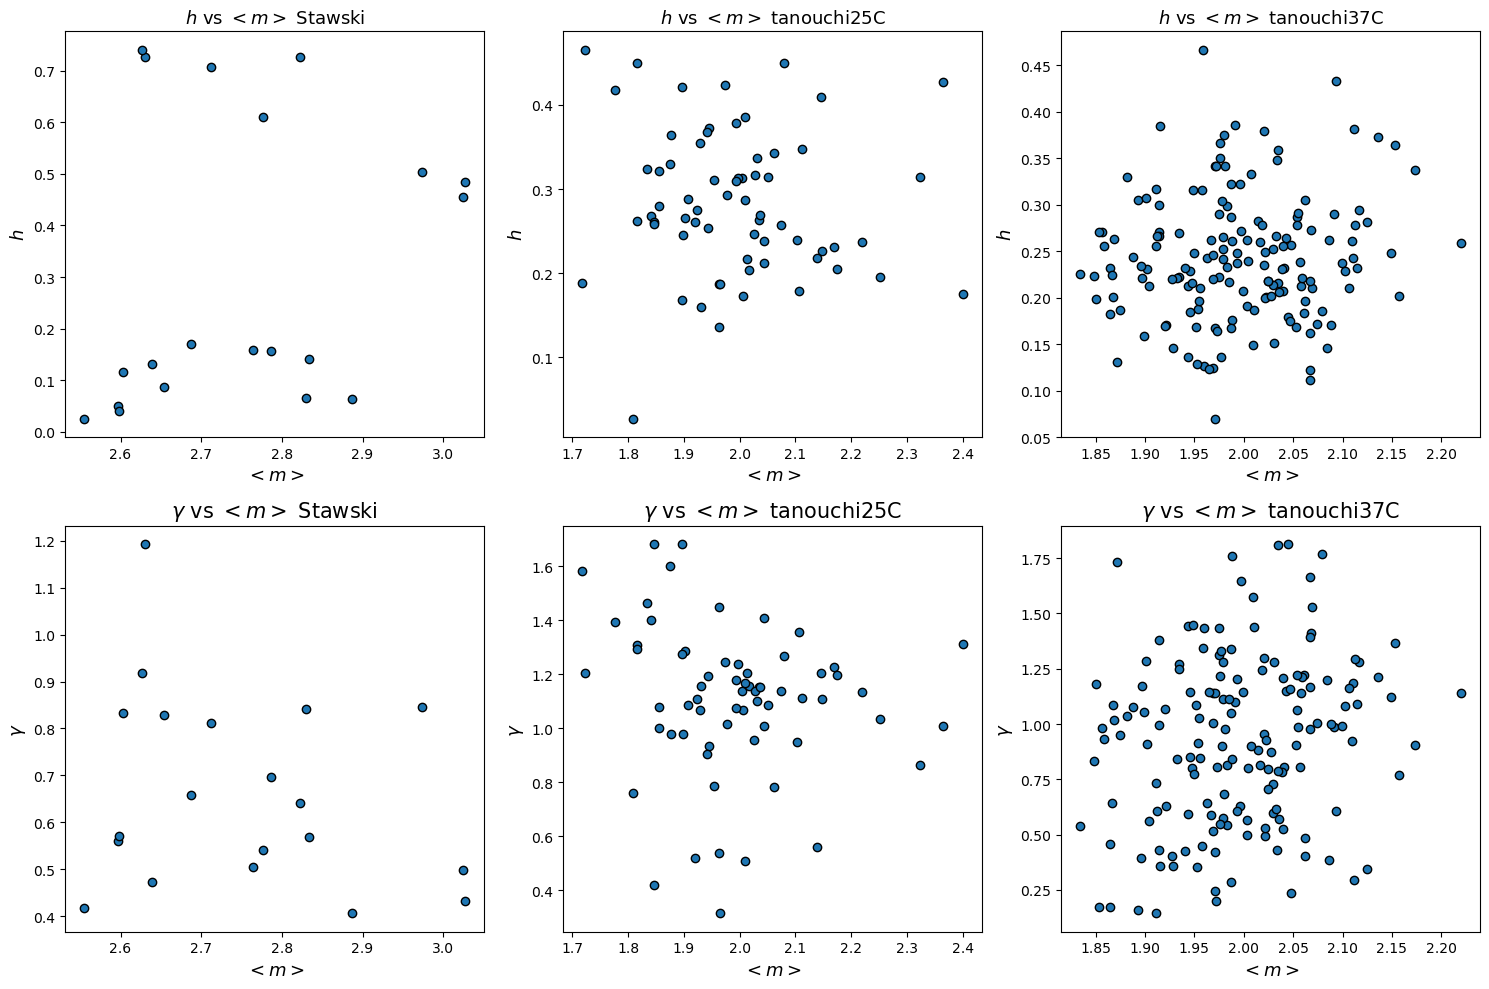

In [6]:
bayesPath: str = '/Users/tommaso/Desktop/masterThesis/data/bayesianInference/'
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, dataset in enumerate(list(dbPath.keys())):
    bayesDf: pd.DataFrame = pd.read_csv(bayesPath + dataset + 'Bayes.csv')
    tanouchiVector: np.ndarray = np.load(
        basePath + dbPath[dataset] + 'tanouchiCorrelations1.npy')
    bayesDf['h'] = bayesDf['u'] / bayesDf['v']
    bayesDf['gamma'] = bayesDf['omega_2'] / ((bayesDf['c']) * bayesDf['d'])

    ax[0, i].scatter(tanouchiVector[2], bayesDf['h'], edgecolor='black')
    ax[0, i].set_xlabel('$<m>$', fontsize=13)
    ax[0, i].set_ylabel('$h$', fontsize=13)
    ax[0, i].set_title(f'$h$ vs $<m>$ {dataset}', fontsize=13)

    ax[1, i].scatter(tanouchiVector[2], bayesDf['gamma'], edgecolor='black')
    ax[1, i].set_xlabel('$<m>$', fontsize=13)
    ax[1, i].set_ylabel('$\\gamma$', fontsize=13)
    ax[1, i].set_title(f'$\\gamma$ vs $<m>$ {dataset}', fontsize=15)

fig.tight_layout()

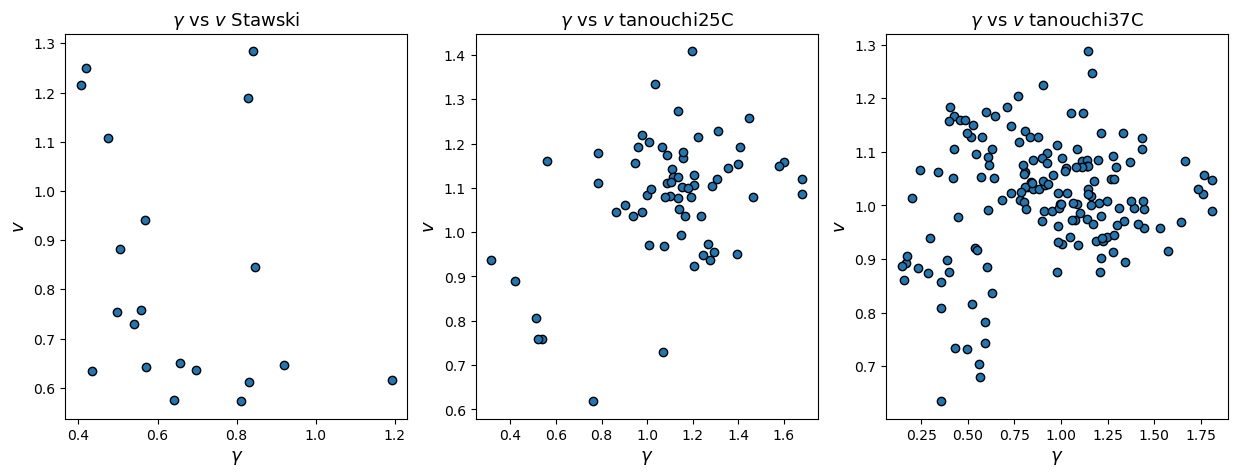

In [24]:
bayesPath: str = '/Users/tommaso/Desktop/masterThesis/data/bayesianInference/'
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, dataset in enumerate(list(dbPath.keys())):
    bayesDf: pd.DataFrame = pd.read_csv(bayesPath + dataset + 'Bayes.csv')
    tanouchiVector: np.ndarray = np.load(
        basePath + dbPath[dataset] + 'tanouchiCorrelations1.npy')
    bayesDf['h'] = bayesDf['u'] / bayesDf['v']
    bayesDf['gamma'] = bayesDf['omega_2'] / ((bayesDf['c']) * bayesDf['d'])

    ax[i].scatter(bayesDf['gamma'], bayesDf['v'], edgecolor='black')
    ax[i].set_xlabel('$\\gamma$', fontsize=13)
    ax[i].set_ylabel('$v$', fontsize=13)
    ax[i].set_title(f'$\\gamma$ vs $v$ {dataset}', fontsize=13)

## Bayesian simulation


In [7]:
dataPath = Path.cwd().parents[1] / 'data'
tanouchiPath = '/Users/tommaso/Desktop/masterThesis/data/calibratedModel/bayesianSimTanouchi25/'
stawskiPath = dataPath / 'calibratedModel' / 'bayesianSimStawski'
tanouchi25Path = dataPath / 'calibratedModel' / 'bayesianSimTanouchi25'
tanouchi37Path = dataPath / 'calibratedModel' / 'bayesianSimTanouchi37'
tanouchi37SecondInstancePath = dataPath / \
    'calibratedModel' / 'bayesianSimTanouchi37SecondInstance'
tanouchi37ThirdInstancePath = dataPath / \
    'calibratedModel' / 'bayesianSimTanouchi37Thirdinstance'

In [8]:
'''
tmp = np.load(tanouchi37Path / 'timeSerieses.npy')
autoCorr = acf(tmp[0,:], nlags = len(tmp[0,:]) - 1, fft = True)
popt, pcov = curve_fit(autocorrelationExponential, np.arange(len(tmp[0,:])), autoCorr)
plt.scatter(np.arange(len(tmp[0,:])), autoCorr)
plt.plot(np.arange(len(tmp[0,:])), autocorrelationExponential(np.arange(len(tmp[0,:])),*popt))
plt.xlim(left = 0, right = 100)
'''

"\ntmp = np.load(tanouchi37Path / 'timeSerieses.npy')\nautoCorr = acf(tmp[0,:], nlags = len(tmp[0,:]) - 1, fft = True)\npopt, pcov = curve_fit(autocorrelationExponential, np.arange(len(tmp[0,:])), autoCorr)\nplt.scatter(np.arange(len(tmp[0,:])), autoCorr)\nplt.plot(np.arange(len(tmp[0,:])), autocorrelationExponential(np.arange(len(tmp[0,:])),*popt))\nplt.xlim(left = 0, right = 100)\n"

(-0.5543900294837529, 5.0)

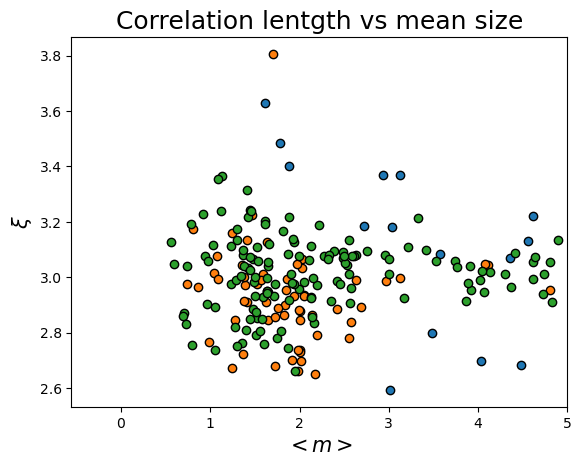

In [9]:
for path, name in zip([stawskiPath, tanouchi25Path, tanouchi37Path], ['Stawski', 'Tanouchi25', 'Tanouchi37']):
    correlations = pd.read_csv(path / 'correlationParameters.csv')
    means = np.load(path / 'momentScaling' / 'allMeans.npy')
    plt.scatter(means[0, :], correlations['correlation'], edgecolor='black')
plt.xlabel('$<m>$', fontsize=15)
plt.ylabel('$\\xi$', fontsize=15)
plt.title('Correlation lentgth vs mean size', fontsize=18)
plt.xlim(right=5)

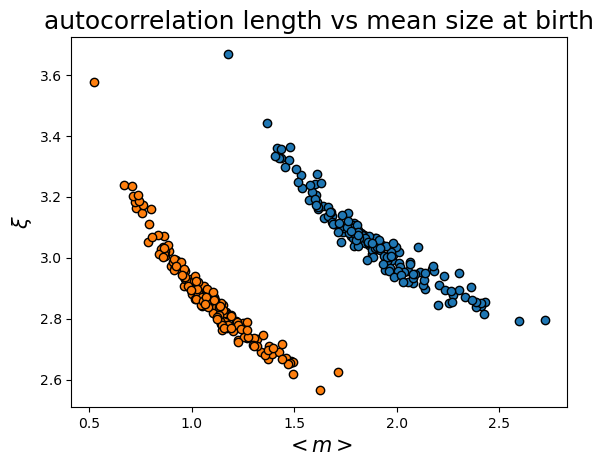

In [18]:
plotCorrelationMeanSize(tanouchi37SecondInstancePath)
plotCorrelationMeanSize(tanouchi37ThirdInstancePath)
#plt.xlim(left = 1.9, right = 2.3)

,linear,log
k=2,22.270938,1.969466
k=3,601.155692,2.900757


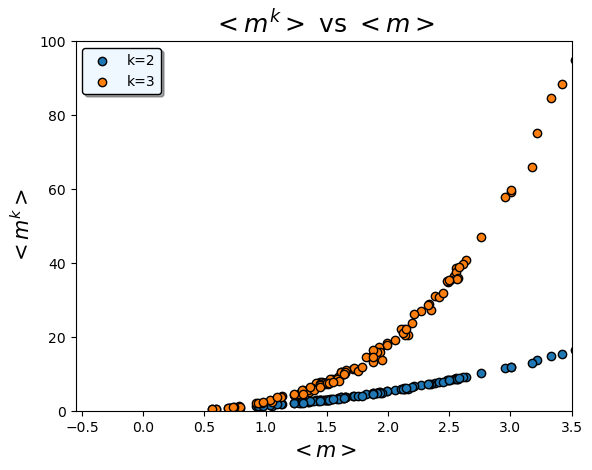

In [11]:
plotMomentScaling(tanouchi37Path / 'momentScaling')
fitDictionary = fitMoments(tanouchi37Path / 'momentScaling')
pd.DataFrame(fitDictionary)
plt.xlim(right=3.5)
_ = plt.ylim(top=100, bottom=0)
pd.DataFrame(fitDictionary)
# plt.xscale('log')
# plt.yscale('log')

,linear,log
k=2,10.949525,1.900365
k=3,121.934781,2.736527


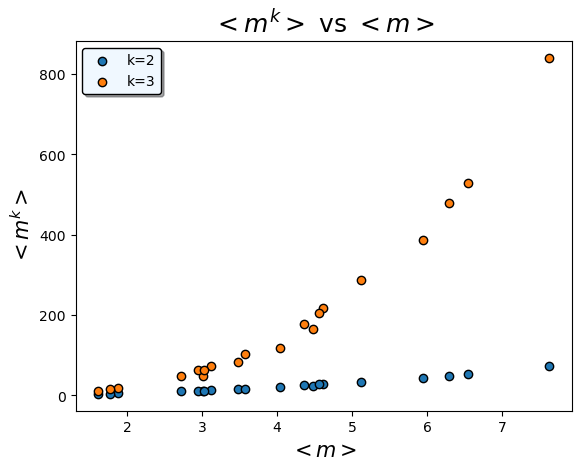

In [12]:
plotMomentScaling(stawskiPath / 'momentScaling')
fitDictionary = fitMoments(stawskiPath / 'momentScaling')
pd.DataFrame(fitDictionary)

pd.DataFrame(fitDictionary)

In [25]:
tmp = pd.read_csv('/Users/tommaso/Downloads/Tanouchi37C.csv')
tmpFiltered = tmp[:115]
tmp2 = pd.read_csv('/Users/tommaso/Downloads/Tanouchi37CSecondStep.csv')
tmp2Filtered = tmp2[115:]
tmp2Joined = pd.concat([tmpFiltered, tmp2Filtered])
tmp2Joined.to_csv(
    '/Users/tommaso/Desktop/masterThesis/data/bayesianInference/Tanouchi37C.csv', index=False)